# Step 1 - Importing libraries and data

## Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing data

In [2]:
# Defining the folder path
path = r'/Users/yusufsalk/Documents/Instacart Basket Analysis'

In [3]:
path

'/Users/yusufsalk/Documents/Instacart Basket Analysis'

In [4]:
# Importing data
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [5]:
# Check the output
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
df_merged.shape

(32404859, 33)

# Step 2 - Follow the instructions in the Exercise to create different charts.

## Creating bar chart

<Axes: >

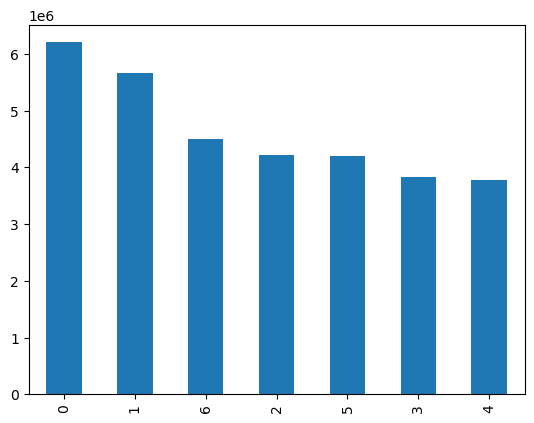

In [7]:
# Create a bar chart
df_merged['orders_day_of_week'].value_counts().plot.bar()

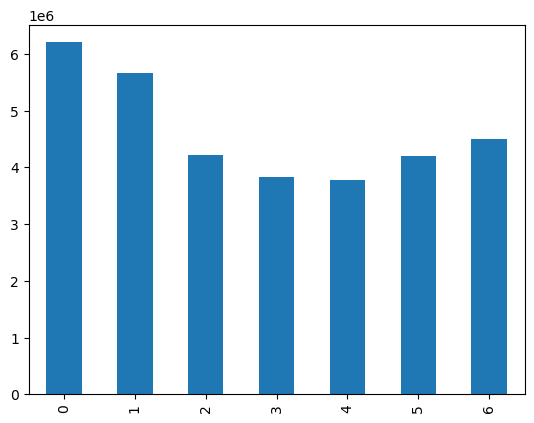

In [8]:
# Sorting the chart according to their index order
bar = df_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
# Sorting the frequency according to their index order
df_merged['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

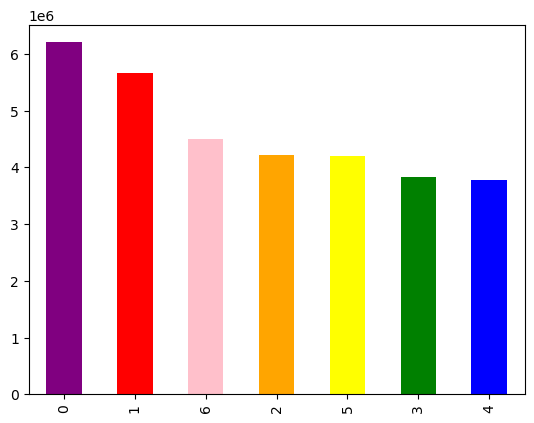

In [10]:
# Changing color in the chart
bar = df_merged['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

## Exporting chart

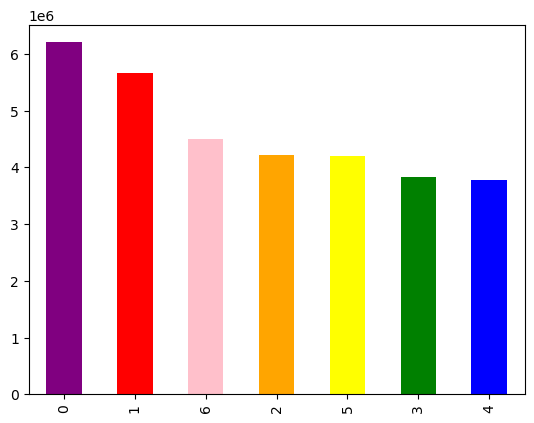

In [11]:
# Calling the chart
bar.figure

In [12]:
# Exporting the chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

## Creating a histogram

<Axes: ylabel='Frequency'>

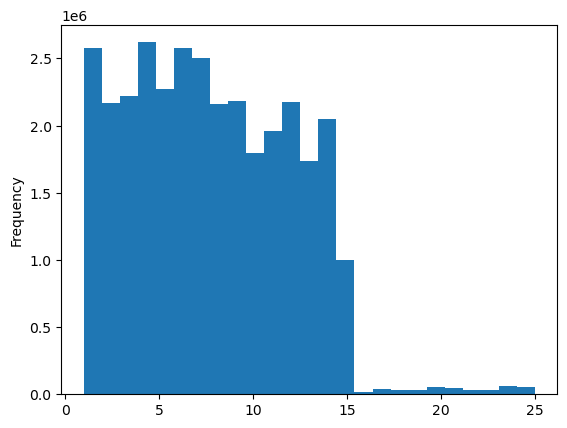

In [13]:
df_merged['prices'].plot.hist(bins = 25)

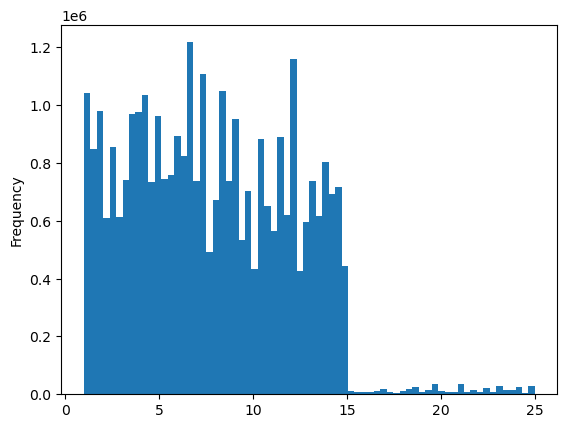

In [14]:
# Increasing the level of granularity in the histogram
hist = df_merged['prices'].plot.hist(bins = 70)

In [16]:
# Export the chart
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_prices.png'))

## Creating a scatterplot

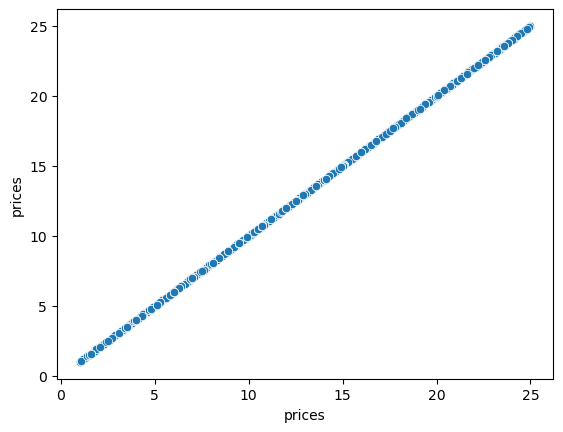

In [19]:
scat_prices = sns.scatterplot(x = 'prices', y = 'prices', data = df_merged)

In [20]:
# Export the chart
scat_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_prices.png'))

## Sampling Data

In [21]:
# Creating a list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [22]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
# np.random.rand() function produces a list of random numbers between 0 and 1
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [24]:
# Store 70% of the sample in the dataframe big
big = df_merged[dev]

In [25]:
# Store 30% of the sample in the dataframe small
small = df_merged[~dev]

In [26]:
# Check the accuracy of results
len(df_merged)

32404859

In [27]:
len(big) + len(small)

32404859

## Creating a line chart

In [28]:
# Reducing samples to only those columns necessary for the chart
df_2 = small[['orders_day_of_week', 'prices']]

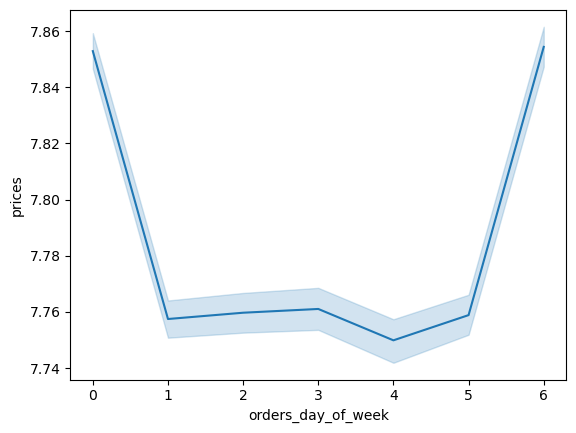

In [30]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [31]:
# Export the chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_dow_prices.png'))

# Step 3 - Create a histogram of the “order_hour_of_day” column.

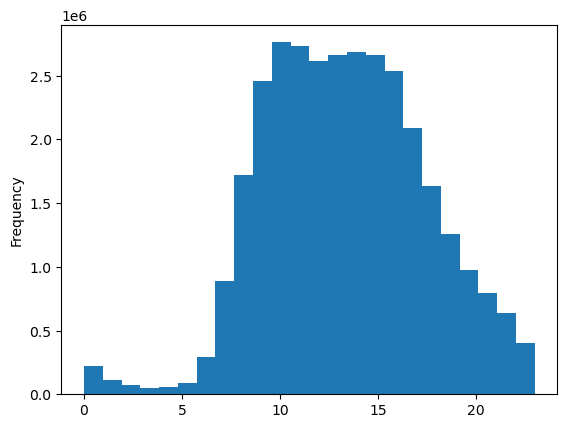

In [32]:
hist_orders_hod = df_merged['order_hour_of_day'].plot.hist(bins = 24)

#### The frequency of orders peaks between 9-16, that is, from 9am to 4pm.

In [33]:
# Export the chart
hist_orders_hod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_hod.png'))

# Step 4 - Create a bar chart from the “loyalty_flag” column.

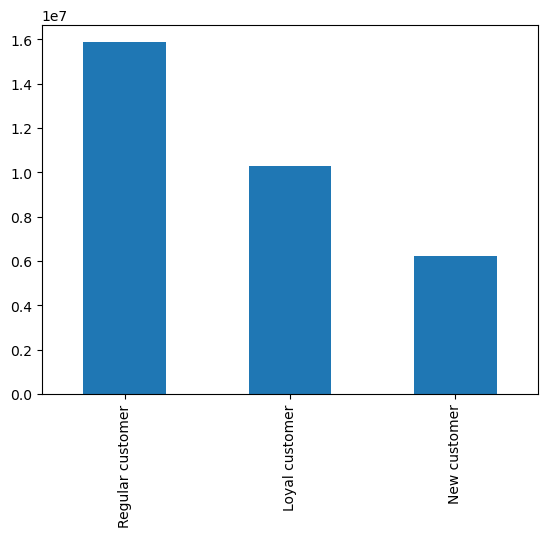

In [34]:
bar_cust_loyalty = df_merged['loyalty_flag'].value_counts().plot.bar()

In [35]:
# Export the chart
bar_cust_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_cust_loyalty.png'))

# Step 5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

## Creating a line chart

In [36]:
# Reducing samples to only those columns necessary for the chart
df_3 = small[['order_hour_of_day', 'prices']]

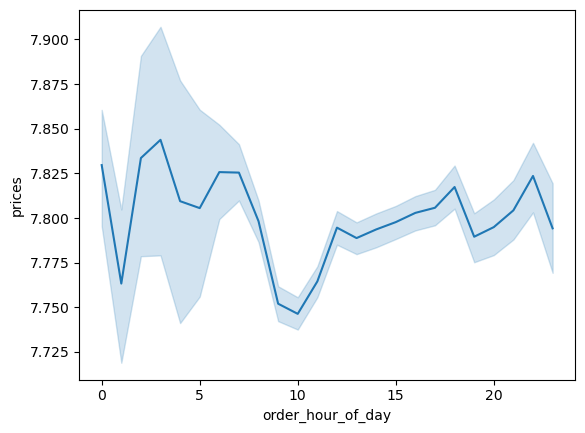

In [37]:
# Creating a line chart
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [38]:
# Export the chart
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_expenditures_hod.png'))

# Step 6 - Exploratory analysis of customer demographics

#### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [39]:
# Reducing samples to only those columns necessary for the chart
df_4 = small[['age', 'n_dependants']]

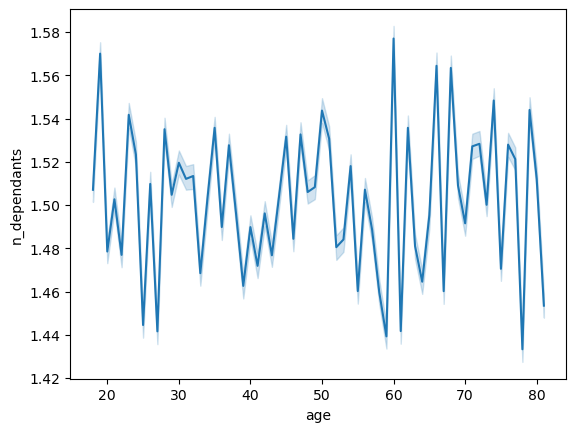

In [41]:
#Creating a line chart
line_3 = sns.lineplot(data = df_4, x = 'age', y = 'n_dependants')

#### By looking at the line chart above, there is no sensible relation between age and number of dependents. There are peaks in the 20s and 60s, or likewise bottoms across different age groups, such as the age of 25, in the 60s and 80s.

In [42]:
# Export the chart
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))

# Step 7 - Visualize the relationship between age and income

#### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

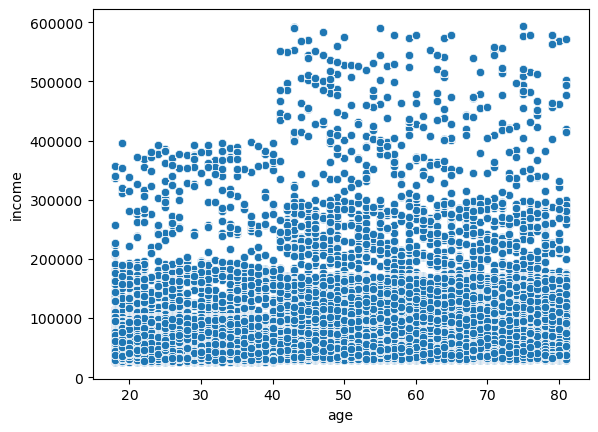

In [43]:
# Creating a scatterplot
scat_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_merged)

#### It can be seen from the chart that there is a correlation between age and income. The majority of people aged 20 to 40 earn around 200K, and the rest can reach up to 400K. After the age of 40, the average income rises to 300K and the ceiling limit to 600K. It makes sense that people make more money as they get older.

In [44]:
# Export the chart
scat_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scat_age_income.png'))